In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# import matplotlib
# matplotlib.rcParams.update({'font.size':18})
# matplotlib.rcParams.update({'font.family':'serif'})

# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

## Puzzle 1

<IPython.core.display.Javascript object>


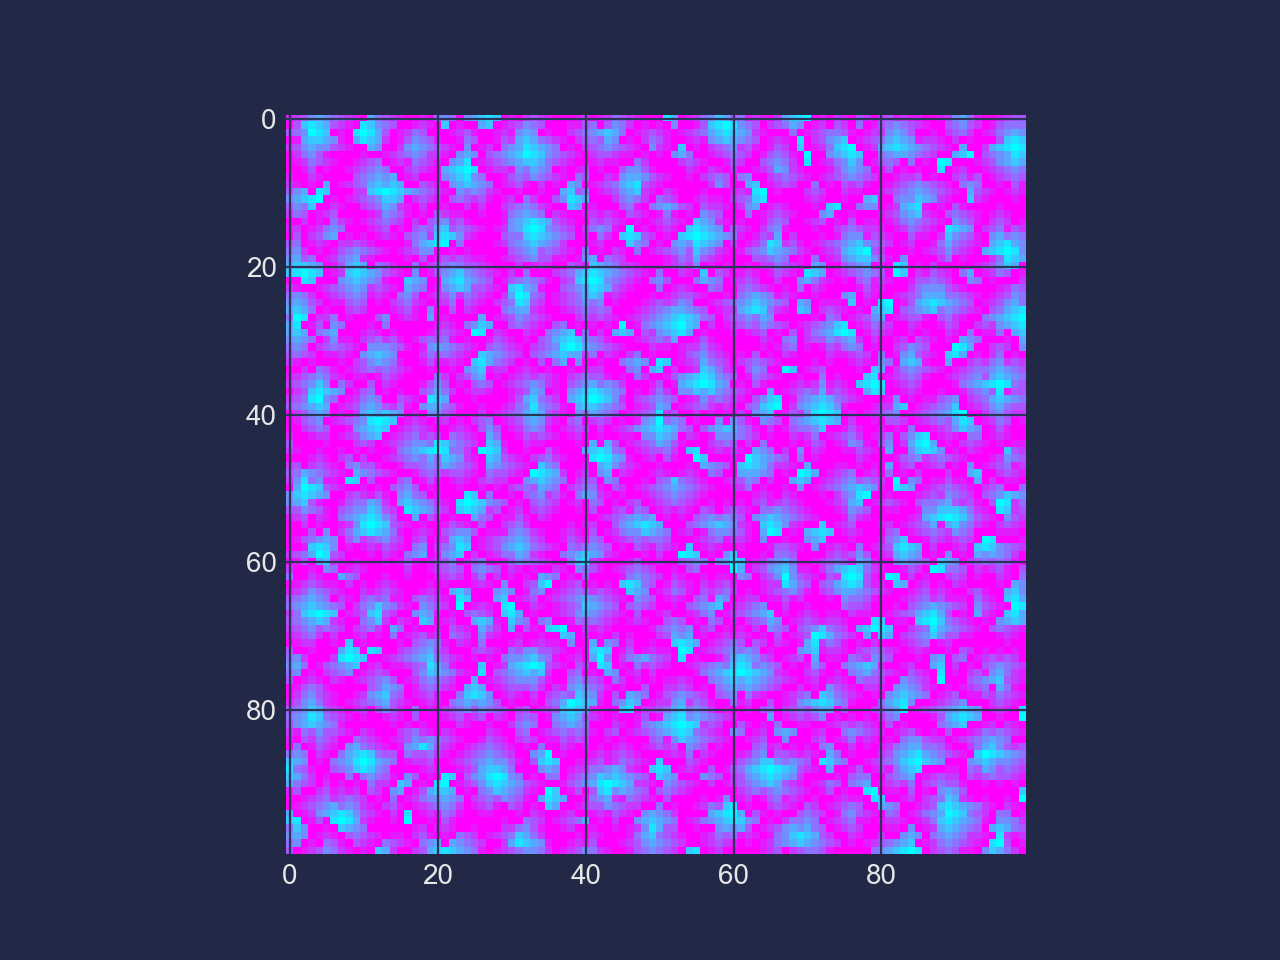

In [37]:
data = np.loadtxt('input.txt', dtype=str)

data_grid = np.zeros((len(data[0]), len(data)))
for k in range(len(data)):
    data_grid[:,k] = np.array(list(data[k]), dtype=int)

plt.imshow(data_grid)

In [45]:
# test = np.array(['2199943210',
#                 '3987894921',
#                 '9856789892',
#                 '8767896789',
#                 '9899965678'])

# test_grid = np.zeros((len(test[0]), len(test)))
# for k in range(len(test)):
#     test_grid[:,k] = np.array(list(test[k]), dtype=int)
# test_grid

In [49]:
# brute force, here we come!
# pad array w/ -1's to elim need to consider edges

# test_grid2 = np.zeros((test_grid.shape[0]+2, test_grid.shape[1]+2)) +9
# test_grid2[1:-1, 1:-1] = test_grid
test_grid2 = np.zeros((data_grid.shape[0]+2, data_grid.shape[1]+2)) +9
test_grid2[1:-1, 1:-1] = data_grid

risk = 0
for i in range(1,test_grid2.shape[0]-1):
    for j in range(1,test_grid2.shape[1]-1):
        if ((test_grid2[i,j] < test_grid2[i-1,j]) & 
            (test_grid2[i,j] < test_grid2[i+1,j]) & 
            (test_grid2[i,j] < test_grid2[i,j-1]) & 
            (test_grid2[i,j] < test_grid2[i,j+1])):
            risk += (test_grid2[i,j]+1)

In [94]:
int(risk)

522

## Puzzle 2

<IPython.core.display.Javascript object>


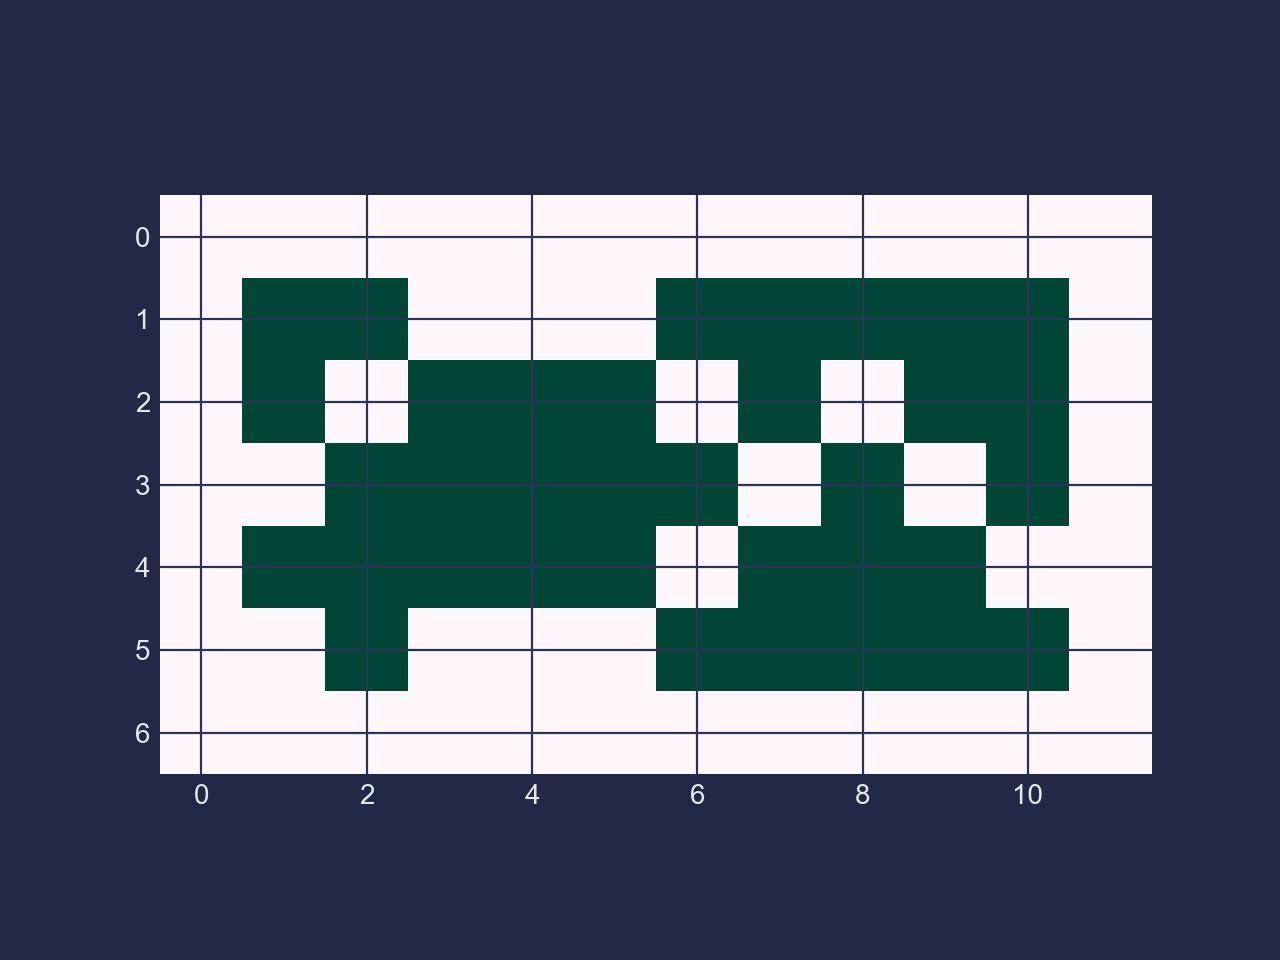

In [210]:
test_grid2 = np.zeros((test_grid.shape[0]+2, test_grid.shape[1]+2)) +9
test_grid2[1:-1, 1:-1] = test_grid

tg = np.array(test_grid2 < 9, dtype=int)
plt.imshow(tg.T, cmap=plt.cm.PuBuGn)

<IPython.core.display.Javascript object>


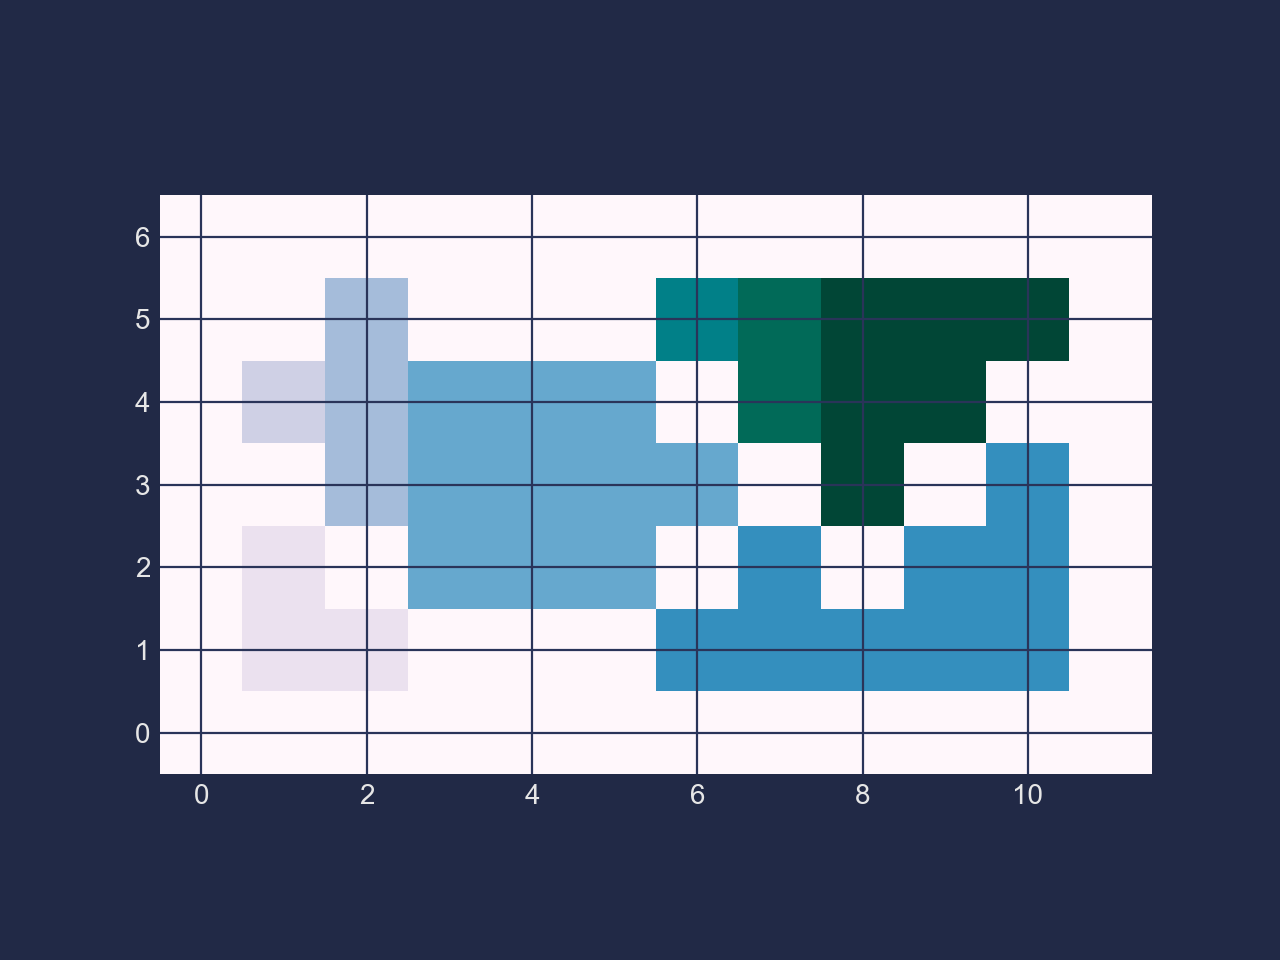

In [211]:
# this ALMOST works... but not quite :(
gp_counter = 0
gp = np.zeros_like(tg)
for i in range(1,tg.shape[0]-1):
    for j in range(1,tg.shape[1]-1):
        if tg[i,j] == 1: # if point is in a basin
#             print(i,j,gp[[i-1, i+1, i, i], [j, j, j-1, j+1]] )
            # test all neighbors for basin group numbers
            if np.sum(gp[[i-1, i+1, i, i], [j, j, j-1, j+1]]) < 1:
                gp_counter += 1
                gp[i,j] = gp_counter
            else:
                gp[i,j] = np.max(gp[[i-1, i+1, i, i], [j, j, j-1, j+1]])

plt.imshow(gp.T, origin='lower', cmap=plt.cm.PuBuGn)

<IPython.core.display.Javascript object>


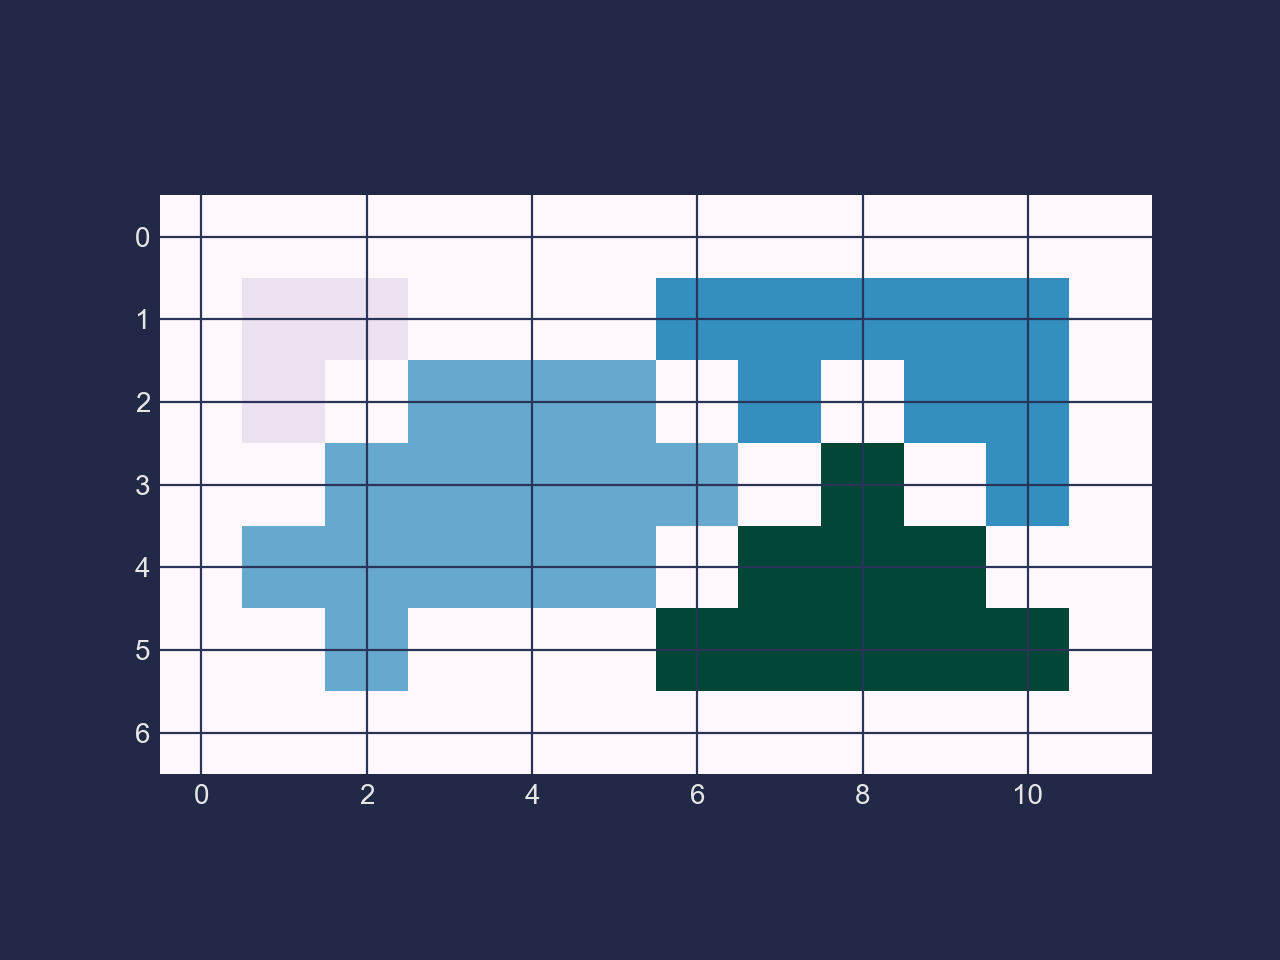

In [215]:
# but if we just run it repeatedly, the slight mis-groups should resolve eventually!
# gp_counter = 0
# gp = np.zeros_like(tg)
for i in range(1,tg.shape[0]-1):
    for j in range(1,tg.shape[1]-1):
        if tg[i,j] == 1: # if point is in a basin
#             print(i,j,gp[[i-1, i+1, i, i], [j, j, j-1, j+1]] )
            # test all neighbors for basin group numbers
            if np.sum(gp[[i-1, i+1, i, i], [j, j, j-1, j+1]]) < 1:
                gp_counter += 1
                gp[i,j] = gp_counter
            else:
                gp[i,j] = np.max(gp[[i-1, i+1, i, i], [j, j, j-1, j+1]])

plt.imshow(gp.T, cmap=plt.cm.PuBuGn)

In [217]:
gpsizes = []
for k in np.unique(gp)[1:]:
    gpsizes = np.append(gpsizes, np.sum(gp == k))
x
# gpsizes.sort()
ss = np.argsort(gpsizes)

print(np.product(gpsizes[ss][-3:]))

1134.0


In [236]:
test_grid2 = np.zeros((data_grid.shape[0]+2, data_grid.shape[1]+2)) +9
test_grid2[1:-1, 1:-1] = data_grid
tg = np.array(test_grid2 < 9, dtype=int)

gp_counter = 0
gp = np.zeros_like(tg)
gp_L = np.zeros_like(tg)

# the number of clusters isnt changing, but their membership is slightly...
# convergence occurs when all pixels are fixed, not when cluster number stops

bzz = 100
while bzz > 0:
    for i in range(1,tg.shape[0]-1):
        for j in range(1,tg.shape[1]-1):
            if tg[i,j] == 1: # if point is in a basin
                if np.sum(gp[[i-1, i+1, i, i], [j, j, j-1, j+1]]) < 1:
                    gp_counter += 1
                    gp[i,j] = gp_counter
                else:
                    gp[i,j] = np.max(gp[[i-1, i+1, i, i], [j, j, j-1, j+1]])
        
    bzz = np.sum(np.abs(gp - gp_L))
    gp_L = gp.copy()

gpsizes = []
for k in np.unique(gp)[1:]:
    gpsizes = np.append(gpsizes, np.sum(gp == k))

ss = np.argsort(gpsizes)

print(gpsizes[ss][-3:])
print(np.product(gpsizes[ss][-3:]))

[ 92.  94. 106.]
916688.0


<IPython.core.display.Javascript object>


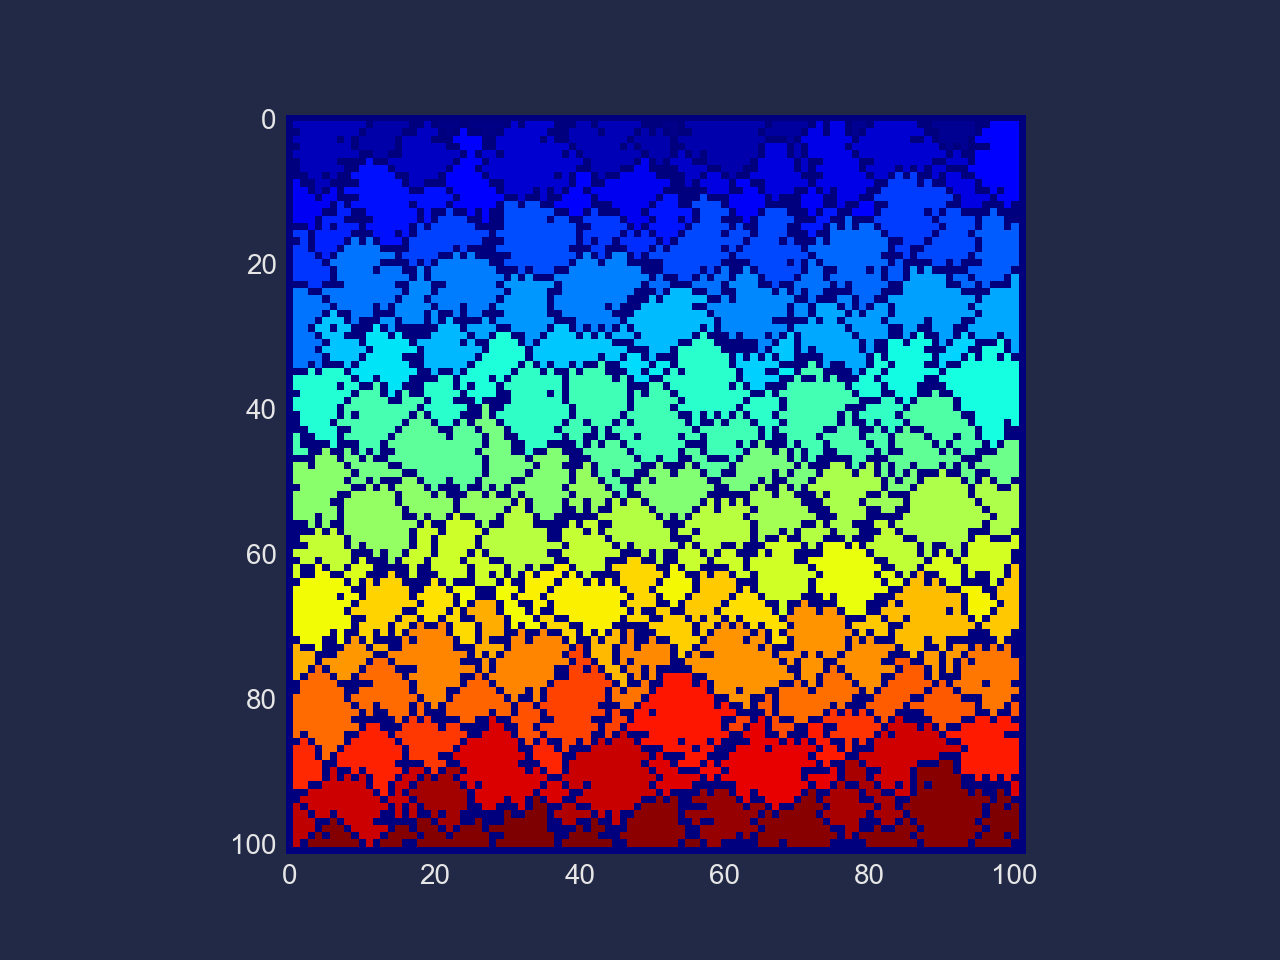

In [237]:
plt.imshow(gp, cmap=plt.cm.jet)
plt.grid(False)